## Análisis de la colección TCE60

Este ejemplo muestra cómo analizar el dataset generado a partir de los documentos TEI originales en XML. Se ha creado un fichero en formato CSV que es posible analizar con la librería Pandas de Python. 

El corpus original se puede consultar en la Biblioteca Virtual Miguel de Cervantes:
https://www.cervantesvirtual.com/portales/teatro_clasico_espanol/obra/canon-60-la-coleccion-esencial-del-tc12-teatro-clasico-espanol/

La colección se basa en los parlamentos de las obras incluidas en el corpus TCE60 organizados a modo de registro (idRegistro, idAutoridad, Personaje, Texto) 

### Importamos las librerías de Python

In [33]:
import pandas as pd
from matplotlib import pyplot as plt

#### Clase Corpus_TEC60
Se ha creado una clase en Python que permite cargar y analizar la colección en formato CSV. A continuación, se detallan los diferentes métodos disponibles para analizar su contenido. 

In [40]:
class Corpus_TCE60:
    def __init__(self, path_csv):
        self.df = pd.read_csv (path_csv, sep=';')
    
    def estructura(self) :
        print('#### estructura del corpus:') 
        print(self.df.columns.tolist())
        print(self.df.dtypes)

    def num_parlamentos(self):
        print('#### numero de parlamentos:') 
        print(self.df.count())
    
    def num_personajes_obra(self):
        print('#### Num de personajes por obra:') 
        personajes_by_registro = self.df.groupby("Registro")["Personaje"].apply(lambda x: x.unique().shape[0])
        print(personajes_by_registro.head(10))

    def num_registros_por_obra(self):
        print('#### Num de registros por obra:') 
        print(self.df.groupby("Registro").size())
    
    def num_obras(self):
        print('#### num_obras en el corpus:') 
        print(self.df['Registro'].describe())
        
    def num_autores(self):
        print('#### num_autores en el corpus:') 
        print(self.df['ID Autoridad'].describe())
        
    def grafica_parlamentos_autor(self):
        self.df.groupby(['ID Autoridad']).count()['Registro'].plot(kind="barh")
        plt.title("Parlamentos por autor")
        plt.ylabel("Id Autoridad")
        plt.xlabel("Núm parlamentos")
        plt.show()
        
    def obras_autor(self):
        self.df.groupby('ID Autoridad').Registro.nunique().plot(kind="barh")
        plt.title("Obras por autor")
        plt.ylabel("Id Autoridad")
        plt.xlabel("Núm obras")
        plt.show()
       

### Inicializamos la clase y ejecutamos los diferentes métodos

In [41]:
corpus = Corpus_TCE60('../data/procesado.csv')

In [42]:
# columnas del fichero CSV con el contenido de la colección TCE60
corpus.estructura()

#### estructura del corpus:
['Registro', 'ID Autoridad', 'Índice', 'Personaje', 'Contenido XML', 'Contenido texto']
Registro           object
ID Autoridad       object
Índice              int64
Personaje          object
Contenido XML      object
Contenido texto    object
dtype: object


In [38]:
# 60 obras
corpus.num_obras()

#### num_obras en el corpus:
count          47895
unique            60
top       682342.xml
freq            1405
Name: Registro, dtype: object


In [29]:
# 22 autores
corpus.num_autores()

#### num_autores en el corpus:
count     47895
unique       22
top          72
freq      13304
Name: ID Autoridad, dtype: object


In [30]:
# personajes por obra
corpus.num_personajes_obra()

#### Num de personajes por obra:
Registro
681756.xml    16
681765.xml    30
681843.xml     9
681846.xml    15
681849.xml    20
681855.xml    22
681858.xml    19
681861.xml    19
681864.xml    20
681868.xml    12
Name: Personaje, dtype: int64


In [31]:
# numero de parlamentos por obra
corpus.num_registros_por_obra()

#### Num de registros por obra:
Registro
681756.xml     665
681765.xml     774
681843.xml     763
681846.xml     313
681849.xml     785
681855.xml     763
681858.xml     740
681861.xml     640
681864.xml     496
681868.xml     490
681873.xml     761
682308.xml     351
682311.xml    1150
682314.xml     631
682317.xml     580
682320.xml     750
682323.xml    1034
682330.xml    1099
682333.xml     347
682342.xml    1405
682348.xml    1131
682351.xml     856
682360.xml     862
682363.xml     985
682366.xml     875
682369.xml    1244
682375.xml    1233
682378.xml     556
682381.xml     864
682384.xml     268
682387.xml     598
703732.xml     795
703735.xml     868
703738.xml     925
703741.xml     240
703744.xml     837
703747.xml    1090
703753.xml     535
703759.xml    1064
703765.xml     789
703774.xml     859
703795.xml     888
703942.xml    1057
703951.xml     643
707437.xml     753
707442.xml     755
707446.xml     786
707454.xml     813
707658.xml     927
707661.xml    1208
707664.xm

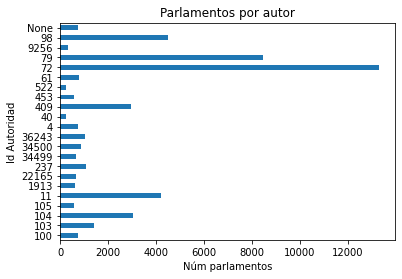

In [32]:
# identificador autoridad en la BVMC y número de parlamentos en el corpus completo
corpus.grafica_parlamentos_autor()

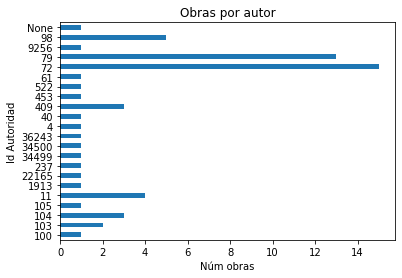

In [23]:
# obras por autor, identificador de la BVMC (por ejemplo 72 corresponde a Lope de Vega) 
corpus.obras_autor()

In [43]:
corpus.num_parlamentos()

#### numero de parlamentos:
Registro           47895
ID Autoridad       47895
Índice             47895
Personaje          47398
Contenido XML      47895
Contenido texto    47895
dtype: int64
